In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the datasets
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

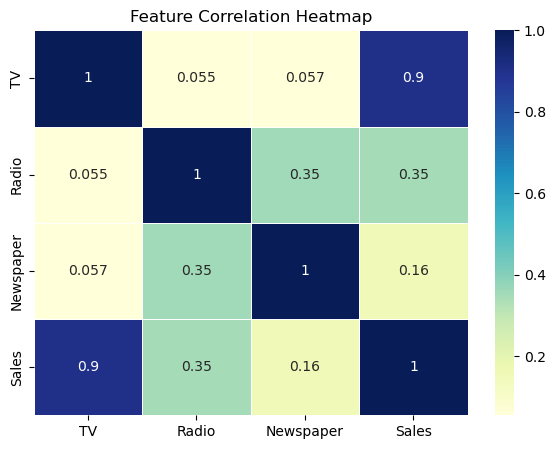

In [8]:
# data visiualization with heatmap, pair plot, histplot, scatter plot
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

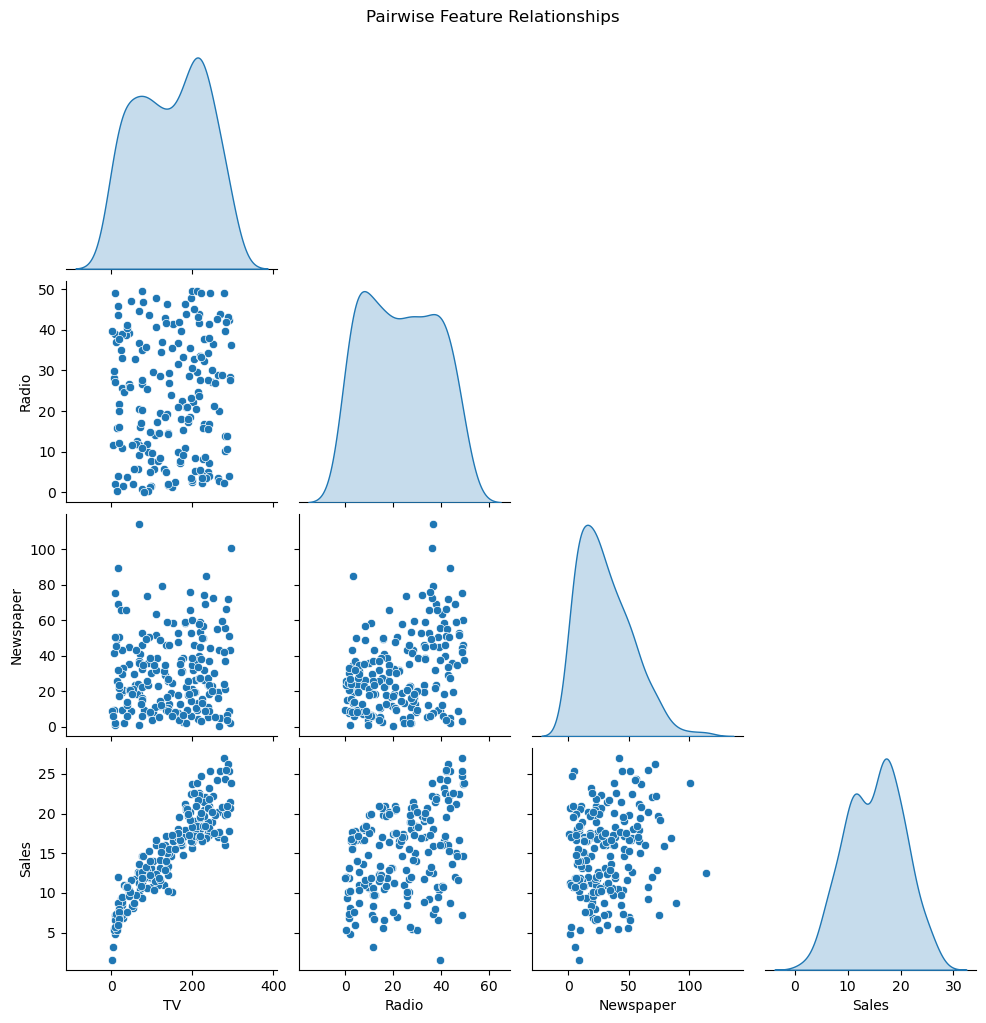

In [9]:
# Pair Plot (Scatter Matrix)
sns.pairplot(df, height=2.5, diag_kind='kde', corner=True)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

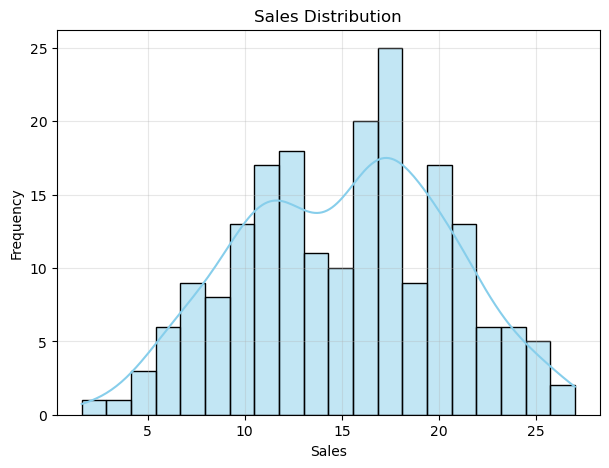

In [10]:
#  histplot
plt.figure(figsize=(7, 5))
sns.histplot(df['Sales'], kde=True, color='skyblue', bins=20)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

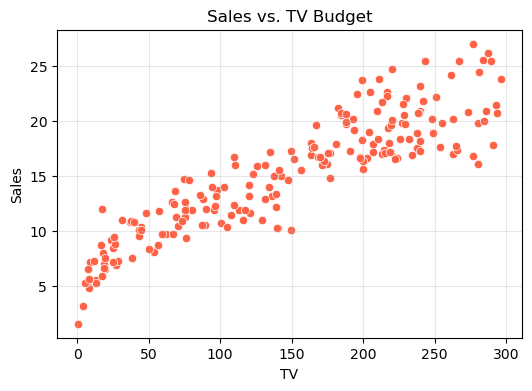

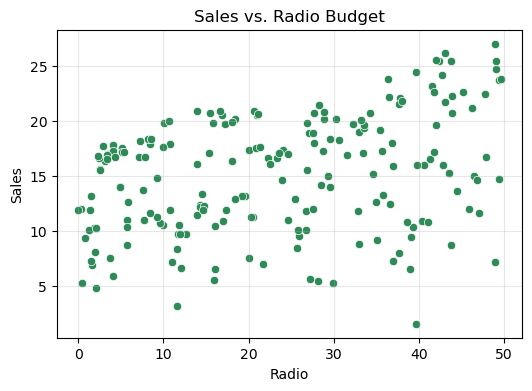

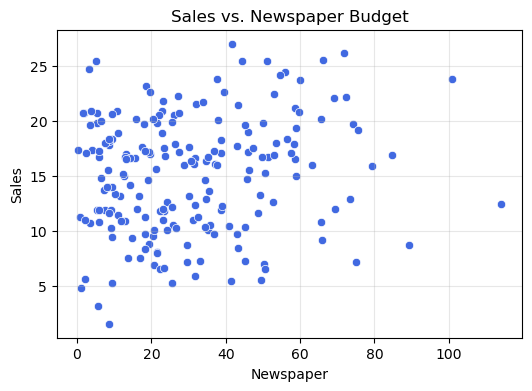

In [11]:
# Sales vs. Individual Ad Budgets with scatter plot
features = ['TV', 'Radio', 'Newspaper']
colors = ['tomato', 'seagreen', 'royalblue']

for feature, color in zip(features, colors):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='Sales', color=color)
    plt.title(f'Sales vs. {feature} Budget')
    plt.grid(True, alpha=0.3)
    plt.show()

In [12]:
# Feature Selection
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [13]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Model trainng by linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"TV Coef: {model.coef_[0]}")
print(f"Radio Coef: {model.coef_[1]}")
print(f"Newspaper Coef: {model.coef_[2]}")


Model Coefficients:
Intercept: 4.714126402214134
TV Coef: 0.05450927083721976
Radio Coef: 0.10094536239295573
Newspaper Coef: 0.004336646822034021


In [16]:
y_pred = model.predict(X_test)

In [17]:
# Final prediction on test set
predictions = model.predict(X_test)

df = pd.DataFrame(data={"Predicted Sales": y_pred.flatten()})
print(df)

    Predicted Sales
0         17.034772
1         20.409740
2         23.723989
3          9.272785
4         21.682719
5         12.569402
6         21.081195
7          8.690350
8         17.237013
9         16.666575
10         8.923965
11         8.481734
12        18.207512
13         8.067507
14        12.645510
15        14.931628
16         8.128146
17        17.898766
18        11.008806
19        20.478328
20        20.806318
21        12.598833
22        10.905183
23        22.388548
24         9.417961
25         7.925067
26        20.839085
27        13.815209
28        10.770809
29         7.926825
30        15.959474
31        10.634909
32        20.802920
33        10.434342
34        21.578475
35        21.183645
36        12.128218
37        22.809533
38        12.609928
39         6.464413


In [18]:
model.score(X_test, y_test)

0.9059011844150826

In [19]:
# mode train mean suare 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [20]:
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Performance:
Mean Squared Error: 2.91
Root Mean Squared Error: 1.71
R-squared: 0.91


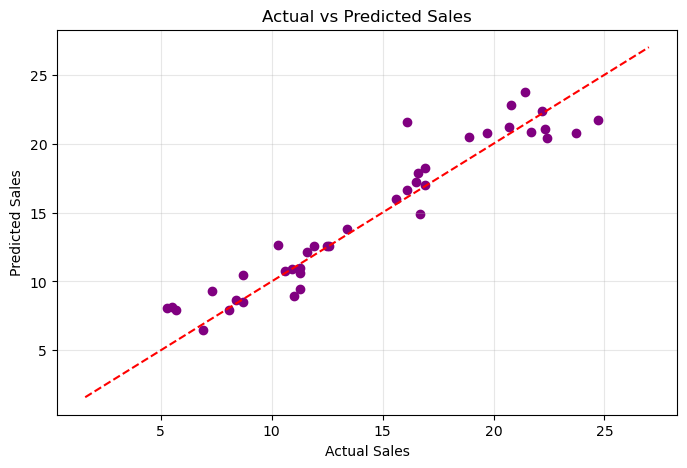

In [21]:
# Visualization of Predictions of model
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True, alpha=0.3)
plt.show()